### FASE 3: BONUS - EVALUACI√ìN FINAL - M√ìDULO 3 - IRINA OSTOJIC

#### _IMPORTS_

In [30]:
# Importamos las librer√≠as que vamos a utilizar

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaci√≥n
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribuci√≥n de las variables
# ------------------------------------------------------------------------------
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

In [31]:
# Lectura de fichero
df = pd.read_csv("datasky_clean.csv")

In [35]:
# GU√çA DE COLORES QUE UTILIZAREMOS DURANTE ESTA FASE DEL EJERCICIO
colores_pop = [
    "lightcoral",      # rojo suave
    "lightskyblue",    # azul cielo
    "plum",            # morado pastel
    "peachpuff",       # melocot√≥n
    "mediumaquamarine", # verde agua
    "palegreen",       # verde menta
    "khaki",           # amarillo suave
    "salmon",          # rosado c√°lido
    "thistle",         # lavanda
    "powderblue",      # azul polvo
    "lightpink"        # rosa claro
    ]

## FASE 3: Evaluaci√≥n de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando el conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el n√∫mero de vuelos reservados seg√∫n el nivel educativo de los clientes. Tendremos en mente que los datos que tenemos son solo una muestra de una poblaci√≥n. Para ello, los pasos que deber√°s seguir son: 

### 1. **Preparaci√≥n de Datos:**
Filtra el conjunto de datos para incluir √∫nicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [32]:
# Realizamos un filtrado y renombramos a las columnas
df_filtrado = df[['flights_booked', 'education']] 

df_filtrado.sample(5)

flights_booked education
82452                0  Bachelor
132304               0  Bachelor
221828               0  Bachelor
82367                2  Bachelor
169297               3  Bachelor

### 2. **An√°lisis Descriptivo:**
Agrupa los datos por nivel educativo y calcula estad√≠sticas descriptivas b√°sicas (como el promedio, mediana, la desviaci√≥n est√°ndar) del n√∫mero de vuelos reservados para cada grupo. Aqu√≠, utilizamos estad√≠stica descriptiva normal.

In [33]:
# Calculamos media, mediana y desviaci√≥n est√°ndar
media_vuelos = df.groupby("education")['flights_booked'].mean().round(2).sort_values()
print(f"La media de vuelos reservados seg√∫n nivel educativo se distribuye de la siguiente forma:")
display(media_vuelos.reset_index())

mediana_vuelos = df.groupby("education")['flights_booked'].median().round(2).sort_values()
print(f"La mediana de vuelos reservados seg√∫n nivel educativo se distribuye de la siguiente forma:")
display(mediana_vuelos.reset_index())

std_vuelos = df.groupby("education")['flights_booked'].std().round(2).sort_values()
print(f"La desviaci√≥n estandar de vuelos reservados seg√∫n nivel educativo se distribuye de la siguiente forma:")
display(std_vuelos.reset_index())

# Lo hacemos todo en un mismo DataFrame
describe_vuelos = df.groupby("education")['flights_booked'].agg(["mean", "median", "std"]).round(2)
print(f"La media, mediana y desviaci√≥n est√°ndar de vuelos reservados seg√∫n nivel educativo se distribuye de la siguiente forma:")
display(describe_vuelos.reset_index())

La media de vuelos reservados seg√∫n nivel educativo se distribuye de la siguiente forma:


education  flights_booked
0              Bachelor            4.11
1               College            4.17
2                Doctor            4.18
3  High School or Below            4.18
4                Master            4.20

La mediana de vuelos reservados seg√∫n nivel educativo se distribuye de la siguiente forma:


education  flights_booked
0              Bachelor             1.0
1               College             1.0
2                Doctor             1.0
3  High School or Below             1.0
4                Master             1.0

La desviaci√≥n estandar de vuelos reservados seg√∫n nivel educativo se distribuye de la siguiente forma:


education  flights_booked
0                Master            5.21
1              Bachelor            5.22
2  High School or Below            5.24
3               College            5.25
4                Doctor            5.26

La media, mediana y desviaci√≥n est√°ndar de vuelos reservados seg√∫n nivel educativo se distribuye de la siguiente forma:


education  mean  median   std
0              Bachelor  4.11     1.0  5.22
1               College  4.17     1.0  5.25
2                Doctor  4.18     1.0  5.26
3  High School or Below  4.18     1.0  5.24
4                Master  4.20     1.0  5.21

- Observamos que la **media** es bastante similar en todos los niveles educativos, variando solo entre Bachelor (con un 4.11) y Master (con un 4.20), por lo que no parece que el nivel de educaci√≥n tenga un impacto en la cantidad promedio de vuelos reservados.

- En cuanto a la **mediana** nos revela que la mayor√≠a de personas reservan s√≥lo un vuelo, independientemente de su valor educativo. Antes hemos observado que la media es mayor que la mediana, por lo que podemos intuir que hay unos pocos usuarios que reservan muchos vuelos, y por tanto, incrementan la media, generando una asimetr√≠a en los resultados.

- La **desviaci√≥n est√°ndar** es alta (alrededor de 5.21 y 5.26) comparada con la media (que estaba entre 4.11 y 4.20). Esto nos confirma que hay mucha variabilidad entre los usuarios: mientras la mayor√≠a reserva pocos vuelos, algunos reservan muchos, lo que eleva la media. La variabilidad es pr√°cticamente la misma para todos los niveles educativos, lo que refuerza la idea de que la educaci√≥n no es un factor determinante en la reserva de vuelos.

Ahora vamos a presentarlo en una gr√°fica de tarta para hacerlo m√°s visual. En ella veremos a qu√© porcentaje equivalen la media, la mediana y la desviaci√≥n est√°ndar.

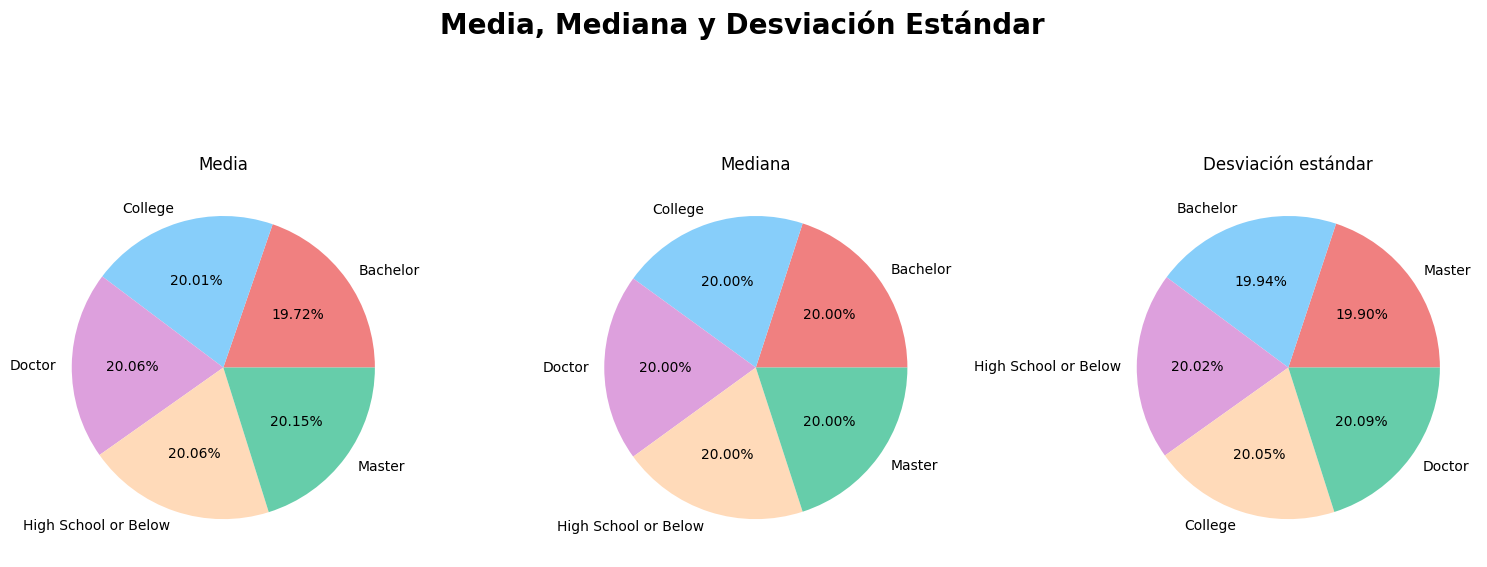

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7))

axes[0].pie(media_vuelos.values, 
            labels=media_vuelos.index, 
            autopct="%1.2f%%",
            colors=colores_pop)
axes[0].set_title("Media")

axes[1].pie(mediana_vuelos.values, 
            labels=mediana_vuelos.index, 
            autopct="%1.2f%%",
            colors=colores_pop)
axes[1].set_title("Mediana")

axes[2].pie(std_vuelos.values, 
            labels=std_vuelos.index, 
            autopct="%1.2f%%",
            colors=colores_pop)
axes[2].set_title("Desviaci√≥n est√°ndar")


fig.suptitle("Media, Mediana y Desviaci√≥n Est√°ndar", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show();

### 3. **Prueba Estad√≠stica:**
Realiza una prueba de hip√≥tesis para determinar si existe una diferencia significativa en el n√∫mero de vuelos reservados entre los diferentes niveles educativos. Aqu√≠ utilizamos estad√≠stica inferencial.

In [ ]:
# Creamos una funci√≥n para realizar pruebas de hip√≥tesis

def prueba_hipotesis(*args):
    """
    Realiza una prueba de hip√≥tesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versi√≥n de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney

    Par√°metros:
    *args: listas o arrays con los datos de cada grupo. Espera DOS grupos a comparar

    Retorna:
    dict con resultados del test de normalidad, varianza e hip√≥tesis.
    """
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estad√≠stico": t_stat,
        "p-valor": p_valor,
        "Conclusi√≥n": "Rechazamos H0. Es decir, s√≠ hay diferencias significativas." if p_valor < alfa else "No se rechaza H0. Es decir, no hay diferencias significativas."
    }

    # Imprimir resultados de manera m√°s clara
    print("\nüìä **Resultados de la Prueba de Hip√≥tesis** üìä")
    print(f"‚úÖ Test de Normalidad: {'S√≠' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"‚úÖ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"‚úÖ Test aplicado: {test_usado}")
    print(f"üìâ Estad√≠stico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"üîç Conclusi√≥n: {resultado['Conclusi√≥n']}\n")

In [ ]:
# Refresco cuales eran los valores de mi columna education para poder hacer las variables que voy a utilizar con el m√©todo
df_filtrado["education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [ ]:
# Creo las variables con m√°scaras
bachelor = df[df['education'] == "Bachelor"]["flights_booked"]
college = df[df['education'] == "College"]["flights_booked"]
master = df[df['education'] == "Master"]["flights_booked"]
highschool = df[df['education'] == "High School or Below"]["flights_booked"]
doctor = df[df['education'] == "Doctor"]["flights_booked"]

In [ ]:
# Aplicamos las hip√≥tesis
print("Comparativa de Bachelor vs. College")
prueba_hipotesis(bachelor, college)
print("-"*100)
print("Comparativa de Bachelor vs. Master")
prueba_hipotesis(bachelor, master)
print("-"*100)
print("Comparativa de Bachelor vs. Highschool")
prueba_hipotesis(bachelor, highschool)
print("-"*100)
print("Comparativa de Bachelor vs. Doctor")
prueba_hipotesis(bachelor, doctor)
print("-"*100)
print("Comparativa de College vs. Master")
prueba_hipotesis(college, master)
print("-"*100)
print("Comparativa de College vs. Highschool")
prueba_hipotesis(college, highschool)
print("-"*100)
print("Comparativa de College vs. Doctor")
prueba_hipotesis(college, doctor)
print("-"*100)
print("Comparativa de Master vs. Highscholl")
prueba_hipotesis(master, highschool)
print("-"*100)
print("Comparativa de Master vs. Doctor")
prueba_hipotesis(master, doctor)
print("-"*100)
print("Comparativa de Highschool vs. Doctor")
prueba_hipotesis(highschool, doctor)

Comparativa de Bachelor vs. College

üìä **Resultados de la Prueba de Hip√≥tesis** üìä
‚úÖ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
‚úÖ Test de Varianza: Desiguales (p = 0.0027)
‚úÖ Test aplicado: Mann-Whitney U
üìâ Estad√≠stico: 12834460862.5000, p-valor: 0.0023
üîç Conclusi√≥n: Rechazamos H0. Es decir, s√≠ hay diferencias significativas.

----------------------------------------------------------------------------------------------------
Comparativa de Bachelor vs. Master

üìä **Resultados de la Prueba de Hip√≥tesis** üìä
‚úÖ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
‚úÖ Test de Varianza: Iguales (p = 0.1183)
‚úÖ Test aplicado: Mann-Whitney U
üìâ Estad√≠stico: 1532540228.0000, p-valor: 0.0141
üîç Conclusi√≥n: Rechazamos H0. Es decir, s√≠ hay diferencias significativas.

----------------------------------------------------------------------------------------------------
Comparativa de Bachelor vs. Highschool

üìä 

Podemos observar que no hay diferencias signficativas a excepci√≥n entre los niveles de educaci√≥n de `Bachelor` con `Highschool`, con `Master` y con `College`.

Como estos resultados nos llaman la atenci√≥n, vamos a calcular tambi√©n un **intervalo de confianza**. 

Un intervalo de confianza coge una muestra sobre la poblaci√≥n, hace la media y calcula el rango dentro del cual es probable que se encuentre la media real de la poblaci√≥n con un nivel de confianza del 95%, por lo que sabremos con exactitud la precisi√≥n de esa media.

In [ ]:
# Nombramos a las variables para recorrerlas con un bucle for
variables = [bachelor, college, master, highschool, doctor]

# Establecemos los nombres en una lista para poder llamarlos tambi√©n
nombres = ["Bachelor", "College", "Master", "Highschool", "Doctor"]

In [ ]:
# Calculamos el intervalo de confianza al 95%
for elemento in range(len(variables)): # por cada elemento que haya en el rango del tama√±o de mis variables / len() da el tama√±o y range genera una secuencia seg√∫n ese tama√±o
    columna = variables[elemento] # 'columna' ser√° mis variables y el elemento que est√© recorriendo
    nombre = nombres[elemento] # 'nombre' ser√° el nombre de mis columnas y el elemento que est√© recorriendo
    n = len(columna) # es el tama√±o de la muestra, que ser√° igual a los valores que tenga que "contar"
    confidence_interval = stats.t.interval( # declaro el m√©todo
        confidence=0.95, # le indico el grado de confianza (normalmente entre un 80% y un 95%)
        df=n - 1, # grados de libertad. siempre se pone as√≠
        loc=columna.mean(), # calculamos la media
        scale=columna.std() / np.sqrt(n)) # la desviaci√≥n estandar entre la ra√≠z cuadrada de mi muestra
    print(f"Columna: {nombre}") # itero por los nombres 
    print(f"Media: {columna.mean():.2f}") # muestro el resultado de la muestra
    print(f"Intervalo de Confianza 95%: {confidence_interval}\n") # muestro el intervalo de confianza
    print("-"*100)

Columna: Bachelor
Media: 4.11
Intervalo de Confianza 95%: (np.float64(4.089923180552734), np.float64(4.1306519539660265))

----------------------------------------------------------------------------------------------------
Columna: College
Media: 4.17
Intervalo de Confianza 95%: (np.float64(4.1375900165274615), np.float64(4.201897564149245))

----------------------------------------------------------------------------------------------------
Columna: Master
Media: 4.20
Intervalo de Confianza 95%: (np.float64(4.108498991872502), np.float64(4.2929008616312005))

----------------------------------------------------------------------------------------------------
Columna: Highschool
Media: 4.18
Intervalo de Confianza 95%: (np.float64(4.1015398627328175), np.float64(4.250878852572496))

----------------------------------------------------------------------------------------------------
Columna: Doctor
Media: 4.18
Intervalo de Confianza 95%: (np.float64(4.098128606614446), np.float64(4.2528

Aunque hemos realizado el c√°lculo de todas las variables a nivel educativo, nos vamos a centrar en analizar la de `Bachelor`. Vemos que entre la media (4.11) y el intervalo de confianza (entre 4.08 y 4.13) no hay grandes diferencias, por lo que entendemos que la media estimada tiene una alta precisi√≥n. Esto refuerza la interpretaci√≥n de los test de hip√≥tesis. **Las diferencias significativas son reales, con un 95% de confianza.**

*CONCLUSI√ìN FINAL*

No hemos encontrado que existan diferencias significativas en la reserva de vuelos seg√∫n el nivel educativo del cliente, a excepci√≥n del grupo `Bachelor`, que presenta diferencias significativas frente a `Highschool`, `Master` y `College`.

El an√°lisis de los intervalos de confianza muestra que la media de reservas de `Bachelor` est√° estimada con alta precisi√≥n, lo que refuerza que las diferencias observadas son reales.

En cambio, los dem√°s grupos presentan medias muy similares entre s√≠, lo que indica que el nivel educativo, fuera de `Bachelor`, no influye de forma significativa en la reserva de vuelos.